# **Análise de dados: Fatalidades Conflito Israel-Palestinos 2000 a 2023**

# **Tópicos**

<ol type="1">
  <li>Introdução;</li>
  <li>Análise Exploratória de Dados;</li>
  <li>Visualização Dados;</li>
  <li>Storytelling.</li>
</ol>

## 1\. Introdução

### **1.1. Conflito entre Israel e Palestinos.**

> Nesse projeto vamos analisar o perfil das vítimas com base nos dados disponíveis, como idade, sexo, cidadania e local de residência. com intuito de identificar características comuns entre as vitimas.
Vamos analisar também os meios pelo qual os individuos foram mortos. Determinar as armas ou métodos mais usados e avaliar o impacto.

### **1.2. Dados**

Os dados estão disponíveis no kaggle ([link](https://www.kaggle.com/datasets/willianoliveiragibin/fatalities-in-the-israeli-palestinian/data)). O conjunto de dados registra mortes no conflito israelense-palestino  de 2000 a 2023.

* **name**: Nome do indivíduo;
* **date_of_event**: Data do evento;
* **age**: Idade do indivíduo;
* **citizenship**: Cidadania;
* **event_location**: Localização do evento ocorrido;
* **event_location_district**: Estado do local ocorrido;
* **event_location_region**: Região do evento ocorrido;
* **date_of_death**: Data da morte;
* **gender**: Gênero do indivíduo (M e F);
* **took_part_in_the_hostilities**: Se participou das hostilidades;
* **place_of_residence**: Local de residência;
* **place_of_residence_district**: Estado aonde se encontra a residência;
* **type_of_injury**: Tipo de lesão;
* **ammuniyion**: Munição utilizada;
* **killed_by**: morto por quem;
* **notes**: Uma descriçao sobre a morte;



## 2\. Análise Exploratória de Dados.

### **2.1 Extração**

In [61]:
import pandas as pd
from datetime import datetime

df_conflito = pd.read_csv('israel-pse.csv', parse_dates=[1], infer_datetime_format=True)


df_conflito.head()# visualizando as primeiras linhas

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


Vamos selecionar as colunas de interesse

In [62]:
df_conflito = df_conflito[['date_of_event', 'age', 'citizenship', 'gender', 'place_of_residence', 'type_of_injury', 'killed_by']]


In [63]:
df_conflito.head()

,date_of_event,age,citizenship,gender,place_of_residence,type_of_injury,killed_by
0,2023-09-24,32.0,Palestinian,M,Nur Shams R.C.,gunfire,Israeli security forces
1,2023-09-24,21.0,Palestinian,M,Nur Shams R.C.,gunfire,Israeli security forces
2,2023-09-22,16.0,Palestinian,M,al-Yamun,gunfire,Israeli security forces
3,2023-09-20,19.0,Palestinian,M,'Aqbat Jaber R.C.,gunfire,Israeli security forces
4,2023-09-19,15.0,Palestinian,M,Jenin,gunfire,Israeli security forces


### 2.1 Wrangling

In [64]:
df_conflito.shape # quantidade de linhas e colunas

(11124, 7)

In [65]:
df_conflito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date_of_event       11124 non-null  datetime64[ns]
 1   age                 10995 non-null  float64       
 2   citizenship         11124 non-null  object        
 3   gender              11104 non-null  object        
 4   place_of_residence  11056 non-null  object        
 5   type_of_injury      10833 non-null  object        
 6   killed_by           11124 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 608.5+ KB


Vamos começar tratando os dados faltantes, a estratégia será a de preencher os buracos com o valor anterior válido mais próximo.

In [66]:
df_conflito = df_conflito.fillna(method='ffill')

Vamos também filtrar a base de dados de acordo com a coluna `date_of_event` .

In [67]:
df_conflito['month'] = df_conflito['date_of_event'].apply(lambda date: date.strftime('%Y-%m'))
df_conflito['year']  = df_conflito['date_of_event'].apply(lambda date: date.strftime('%Y'))

Agora, vamos alterar o nome das colunas.

In [68]:
israel_palestine = df_conflito.rename(
  columns={
    'date_of_event': 'data',
    'age': 'idade',
    'citizenship': 'cidadania',
    'gender': 'sexo',
    'place_of_residence': 'local_de_residencia',
    'type_of_injury': 'tipo_de_injuria',
    'killed_by': 'morto_por',
  }
)

In [69]:
israel_palestine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   data                 11124 non-null  datetime64[ns]
 1   idade                11124 non-null  float64       
 2   cidadania            11124 non-null  object        
 3   sexo                 11124 non-null  object        
 4   local_de_residencia  11124 non-null  object        
 5   tipo_de_injuria      11124 non-null  object        
 6   morto_por            11124 non-null  object        
 7   month                11124 non-null  object        
 8   year                 11124 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 782.3+ KB


Garantir o tipo do dado é fundamental para consistência da base de dados. Vamos fazer o *type casting* das colunas.

In [70]:
israel_palestine['idade'] = israel_palestine['idade'].astype('Int64')

Conferindo o resultado final.

In [71]:
israel_palestine.head()

,data,idade,cidadania,sexo,local_de_residencia,tipo_de_injuria,morto_por,month,year
0,2023-09-24,32,Palestinian,M,Nur Shams R.C.,gunfire,Israeli security forces,2023-09,2023
1,2023-09-24,21,Palestinian,M,Nur Shams R.C.,gunfire,Israeli security forces,2023-09,2023
2,2023-09-22,16,Palestinian,M,al-Yamun,gunfire,Israeli security forces,2023-09,2023
3,2023-09-20,19,Palestinian,M,'Aqbat Jaber R.C.,gunfire,Israeli security forces,2023-09,2023
4,2023-09-19,15,Palestinian,M,Jenin,gunfire,Israeli security forces,2023-09,2023


## 3\. Visualização dos Dados

#### **Distribuição entre Sexo e Idade das vítimas**

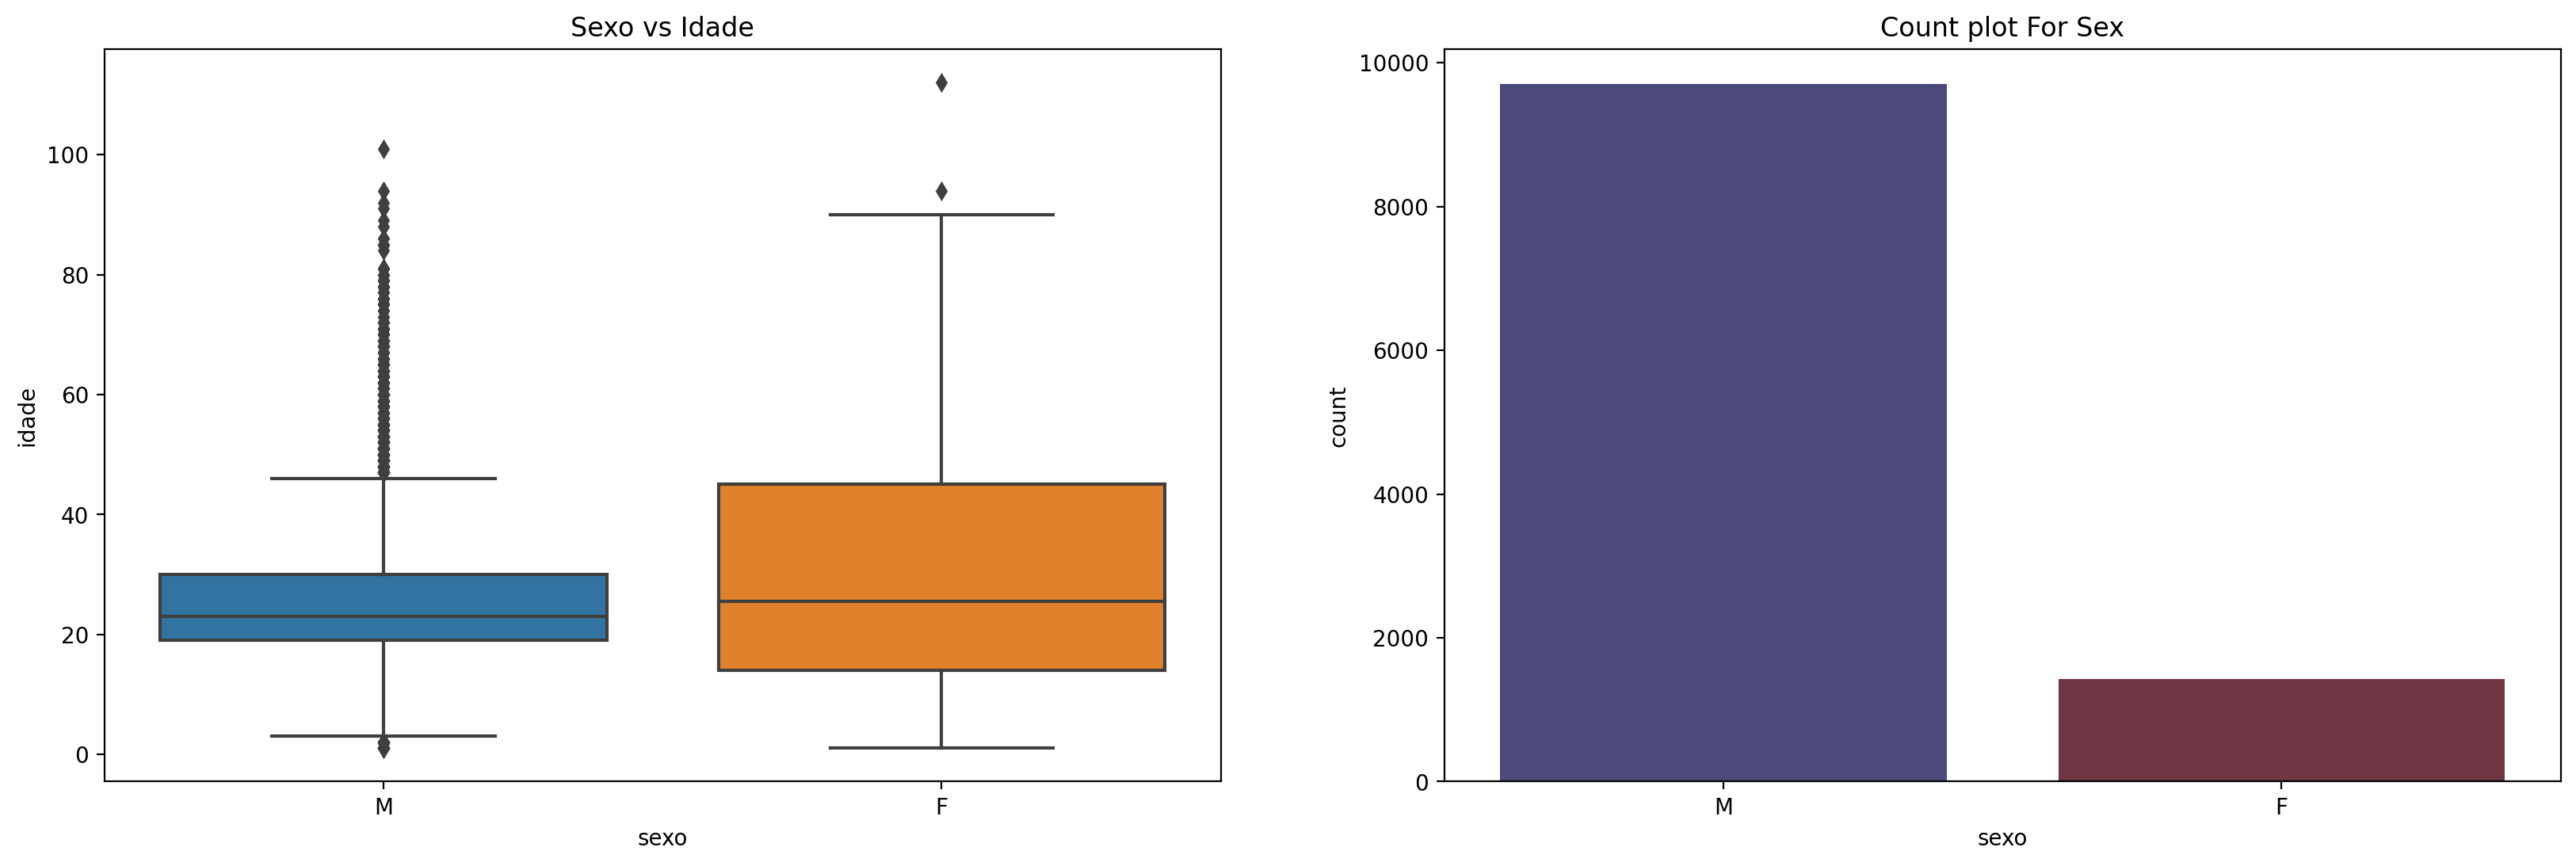

In [72]:
from matplotlib.cbook import is_writable_file_like
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize = (20, 6),dpi=200)
sns.boxplot(data=israel_palestine,x='sexo',y='idade',ax=axes[0]).set_title('Sexo vs Idade')
sns.countplot(data=israel_palestine,x='sexo',ax=axes[1],palette='icefire').set_title('Count plot For Sex')
plt.show()

O gráfico ilustra a distribuição por gêneros  e os **outliers** das fatalidades:

* A maioria das vítimas fatais era do sexo masculino;
* Maioria das vítimas masculinas tinham entre 20 a 30 anos;
* A maioria das vítimas do sexo feminino se concentra entre 20 a 50 anos;

---

#### **Relação entre idade e entidade responsável**

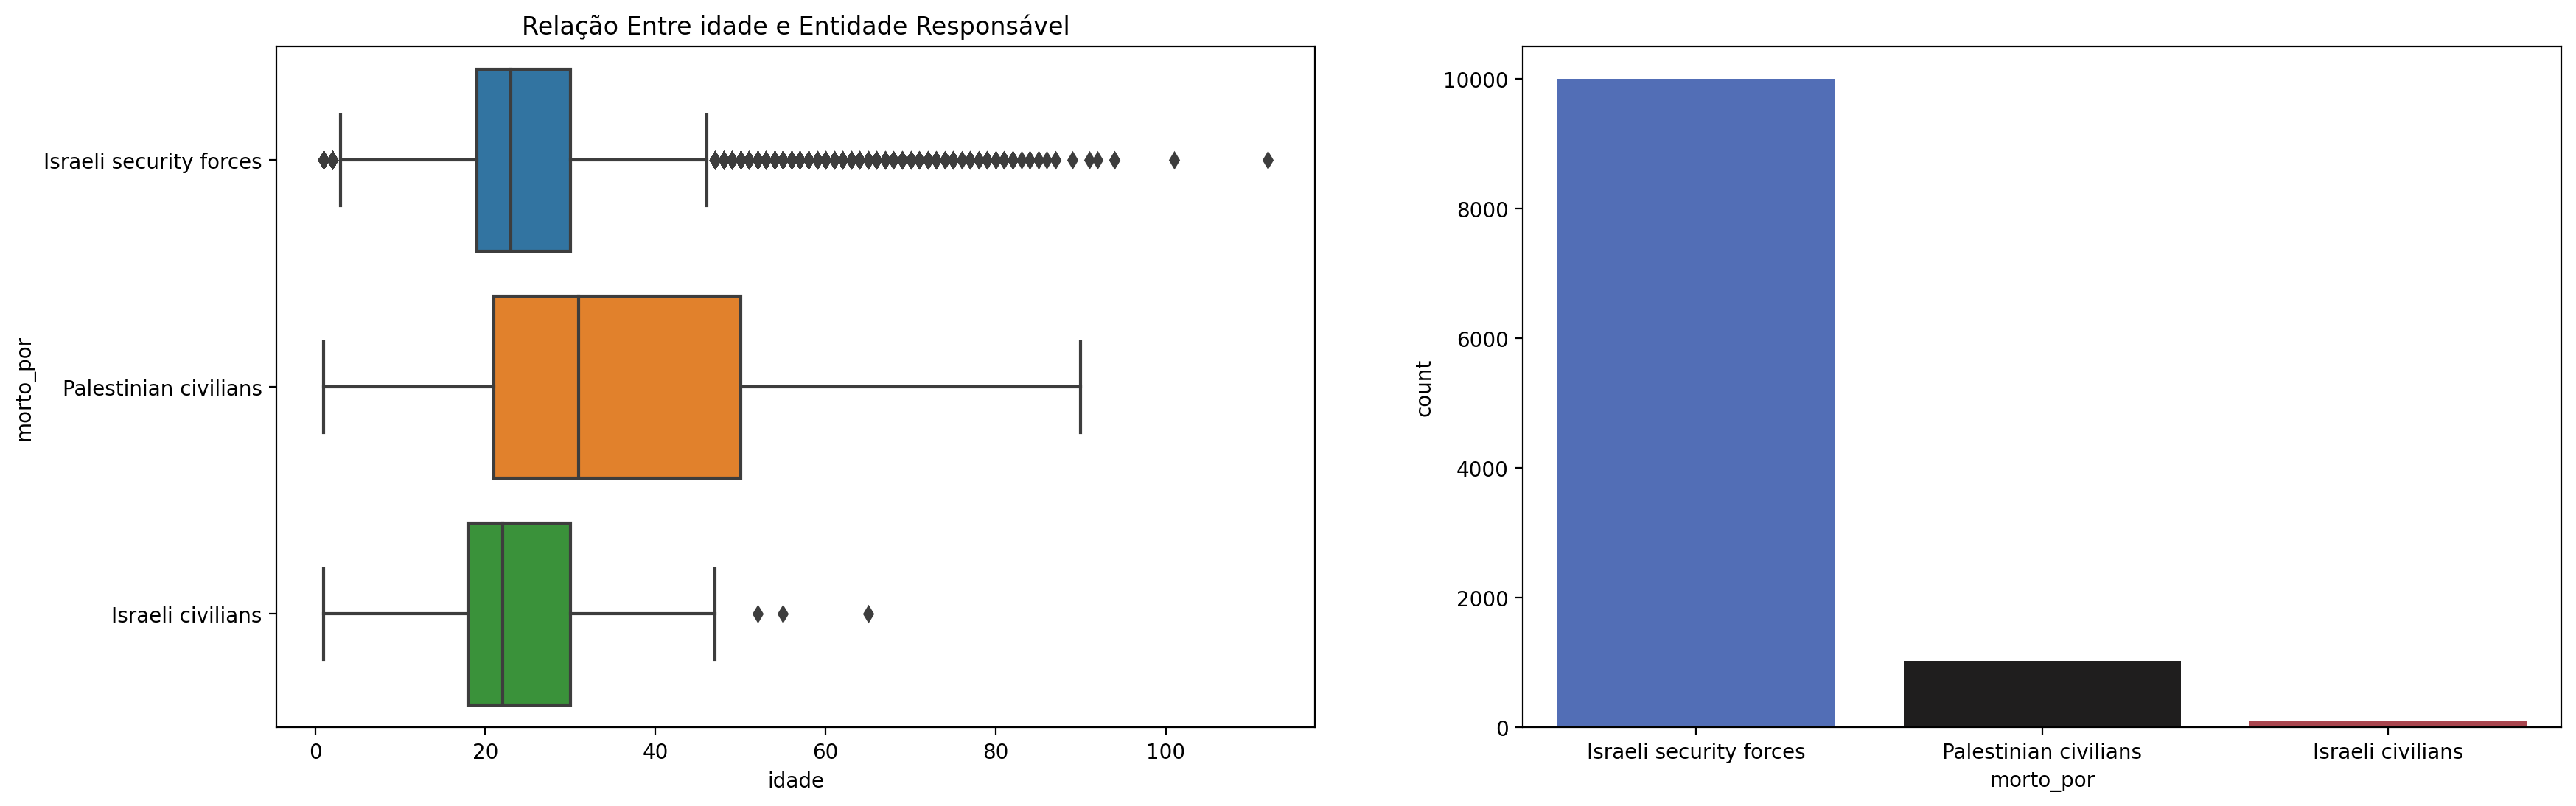

In [73]:
fig, axes = plt.subplots(1, 2, figsize = (20, 6),dpi=200)
sns.boxplot(data=israel_palestine,x='idade',y='morto_por',ax=axes[0]).set_title('Relação Entre idade e Entidade Responsável')
sns.countplot(data=israel_palestine,x='morto_por',ax=axes[1],palette='icefire')
plt.show()

**O gráfico de barras exibe a distribuição das entidades responsáveis pelas fatalidades e se exite alguma correlação com a idade**:

* Os incidentes fatais causado por civis palestinos tem a maior concentração em 20 a 50 anos, onde se encontra a maior parte de vítimas do sexo femininio;
* As forças de segurança israelenses são responsáveis por uma maioria significativa das mortes.
---

#### **Visualizando o top 15 locais comuns de residência entre as vítimas**

In [75]:
import plotly.express as px

residence_distribution = israel_palestine['local_de_residencia'].value_counts().head(15)

fig = px.bar(
    x=residence_distribution.index,
    y=residence_distribution.values,
    title='Top 15 locais comuns de residência entre as vítimas',
    labels={'x': 'Local de residência', 'y': 'Número de Fatalidades'},
    color=residence_distribution.index,
    color_discrete_sequence=px.colors.qualitative.Dark24,
)


fig.update_layout(xaxis_tickangle=-40, xaxis_title='Local de residência', yaxis_title='Número de Fatalidades')

fig.show()

**O gráfico exibe os 15 locais mais comuns entre as vítimas**:

* Gaza city disparadamente se destaca como o local de residência com o maior número de vítimas mortas;
* As três primeiras cidades do gráfico representam cidades da palestina;
* As regiões que contém grandes números de vítimas são cidades da palestina;

---

#### **Visualizando os meios pelo qual os indivíduos foram mortos**

In [76]:
injury_distribution = israel_palestine['tipo_de_injuria'].value_counts()


injury_df = injury_distribution.reset_index()
injury_df.columns = ['Tipo de Injuria', 'Número de Fatalidades']


fig = px.bar(injury_df, x='Tipo de Injuria', y='Número de Fatalidades',
             title='Distribuição entre tipos de injuria',
             labels={'Número de Fatalidades': 'Número de Fatalidades'},
             color='Número de Fatalidades', color_continuous_scale='tropic')

fig.update_layout(xaxis_title='Tipo de Injuria', yaxis_title='Número de Fatalidades',
                  xaxis=dict(tickmode='array', tickangle=40), bargap=0.2)


fig.show()

**O gráfico apresenta diferentes tipos de injura**:

* Armas são o maior responsável pelas mortes. Outros tipos de ferimentos, como os de explosões ou bombardeios, estão presentes, mas em números muito menores.

## 4\. Storytelling

Com os dados disponibilizados, dividimos nosso trabalho por tópicos: Introdução, análise exploratória e visualização dos dados. Através da visualização conseguimos gerar insights valiosos, sendo eles:

* Maior parte das vítimas eram do sexo masculino;
* As forcas de segurança de israel são os principais responsáveis pela maioria das vítimas mortas;
* Gaza city, Rafah e Khan Yunis são as cidades com o maior número de vítimas fatais;
* Armas é disparado o maior responsável pelas mortes, totalizando cerca de 10.000 fatalidades;
* Maior parte da vítimas tem entre 20 e 50 anos, idades acimas representam **outliers**;

**Para todos inocentes que partiram no conflito entre israel e Palestina, que suas vidas nos inspirem a buscar a paz e justiça para que nenhum outro coração sofra a dor da violência.**